<a href="https://colab.research.google.com/github/Vedikapote24/Codsoft/blob/main/Movie%20Rating%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
df = pd.read_csv("IMDb Movies India.csv", encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


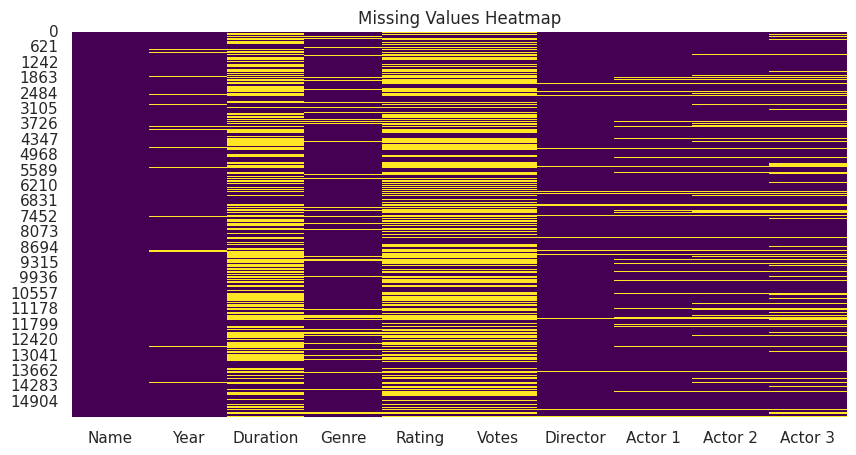

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [8]:
df.isnull().sum().sort_values(ascending=False)


,0
Duration,8269
Rating,7590
Votes,7589
Actor 3,3144
Actor 2,2384
Genre,1877
Actor 1,1617
Year,528
Director,525
Name,0


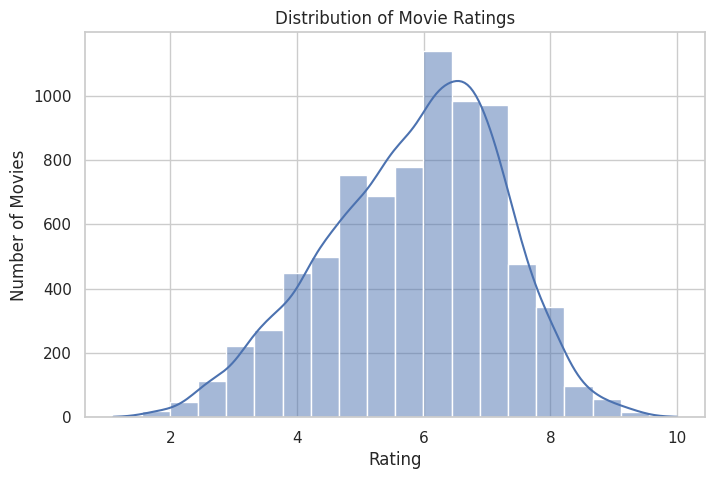

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.show()


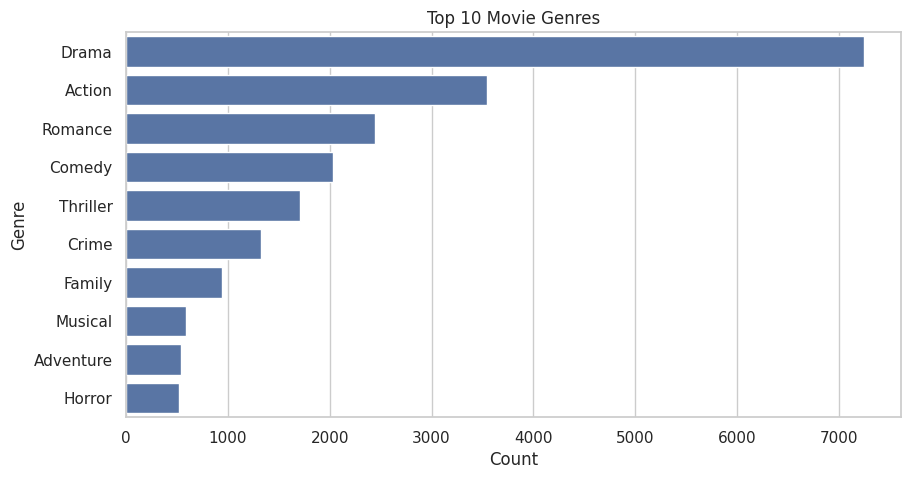

In [10]:
from collections import Counter

genres = df['Genre'].dropna().str.split(',').sum()
genre_count = Counter([g.strip() for g in genres])

top_genres = pd.DataFrame(genre_count.most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(data=top_genres, x='Count', y='Genre')
plt.title("Top 10 Movie Genres")
plt.show()


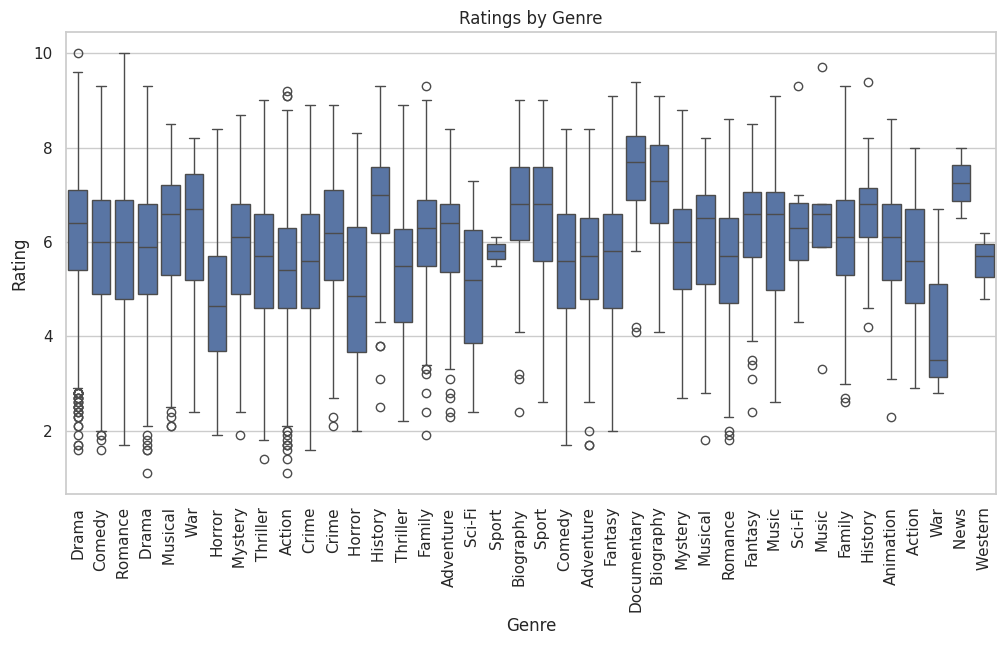

In [11]:
df_genre = df[['Genre', 'Rating']].dropna()
df_genre['Genre'] = df_genre['Genre'].str.split(',')
df_genre = df_genre.explode('Genre')

plt.figure(figsize=(12,6))
sns.boxplot(data=df_genre, x='Genre', y='Rating')
plt.xticks(rotation=90)
plt.title("Ratings by Genre")
plt.show()


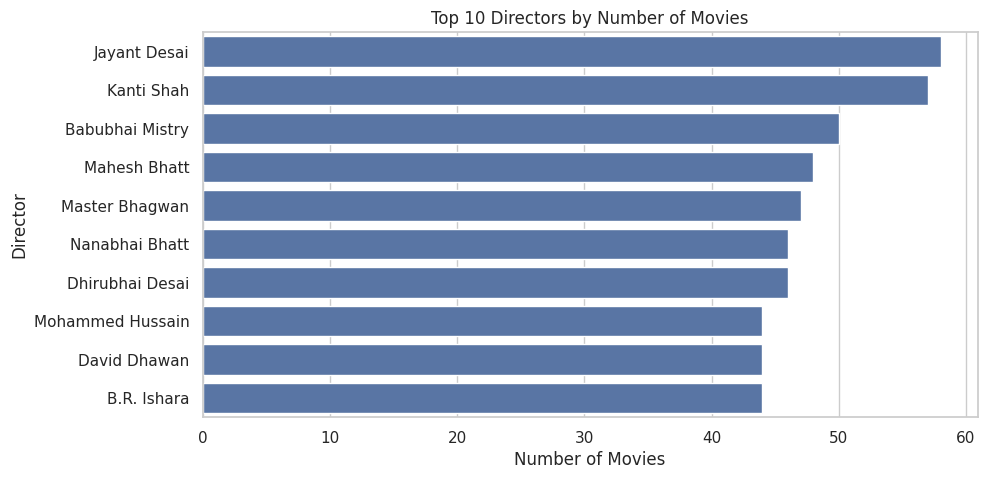

In [12]:
top_directors = df['Director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Directors by Number of Movies")
plt.xlabel("Number of Movies")
plt.show()


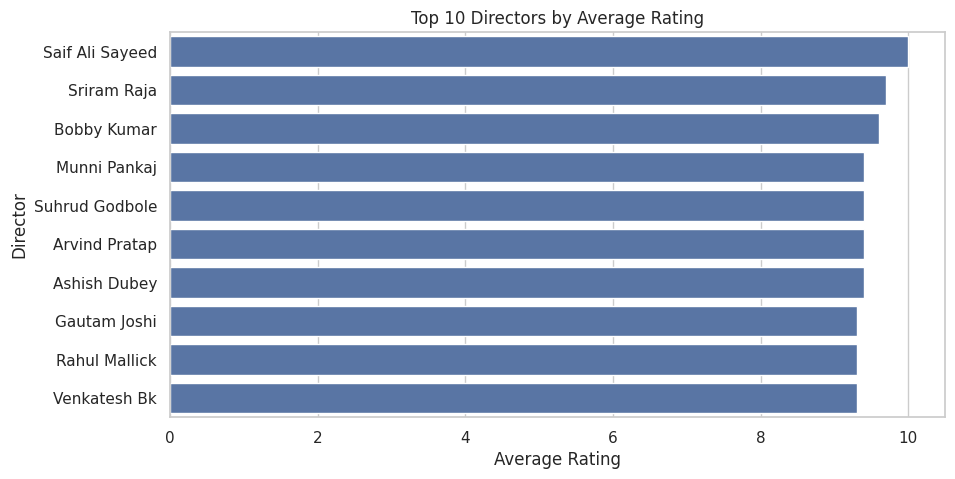

In [13]:
director_rating = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=director_rating.values, y=director_rating.index)
plt.title("Top 10 Directors by Average Rating")
plt.xlabel("Average Rating")
plt.show()


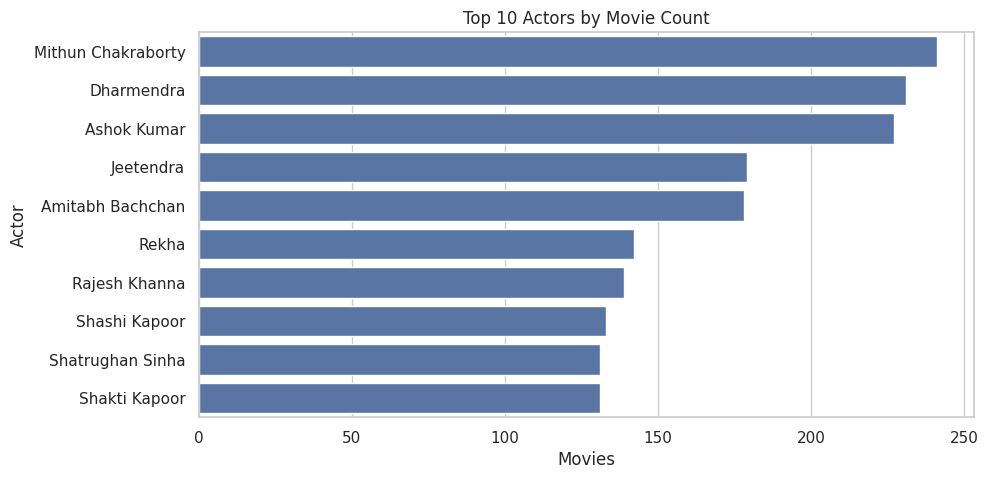

In [17]:
all_actors = []
for col in ['Actor 1', 'Actor 2', 'Actor 3']:
    all_actors.extend(df[col].dropna().apply(lambda x: [a.strip() for a in str(x).split(',')]).explode().tolist())

actor_count = Counter(all_actors)

top_actors = pd.DataFrame(actor_count.most_common(10), columns=['Actor', 'Movies'])

plt.figure(figsize=(10,5))
sns.barplot(data=top_actors, x='Movies', y='Actor')
plt.title("Top 10 Actors by Movie Count")
plt.show()

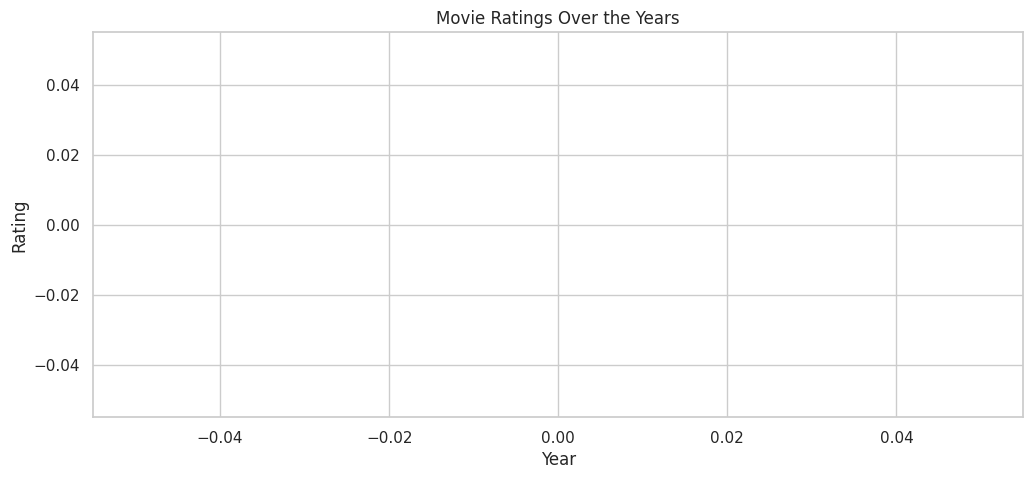

In [18]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='Year', y='Rating')
plt.title("Movie Ratings Over the Years")
plt.show()


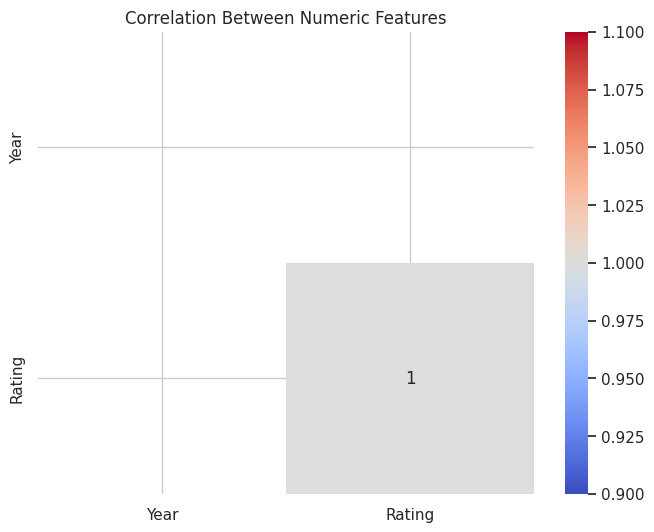

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Features")
plt.show()
